# Stack Overflow Developer Survey 2025 – Exploratory Insights

This notebook focuses solely on exploratory insights derived from the cleaned SO2025 developer survey dataset.

Following the data cleaning and preparation completed earlier, this analysis explores patterns across:
- Demographics
- Developer experience
- Technology stacks
- Workplace behavior
- Salary and earnings
- AI usage and sentiment

The goal is to uncover meaningful relationships that help explain how developers learn, work, earn, and adapt to evolving technologies.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter

In [4]:
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.figsize": (12,6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "font.family": "sans-serif",
        "font.sans-serif": ["DejaVu Sans"]
    }
)

## 1. Importing Dataset

In [5]:
clean_df = pd.read_csv("../datasets/cleaned_survey_results.csv")

In [6]:
clean_df.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearningMethods,YearsCode,DevType,RemoteWork,...,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,CommPlatformHaveWorkedWith,UsedAIBefore,AIModelsHaveWorkedWith,AIToolsUsage,AISentiment,AnnualSalary(USD),AIToolCurrently_partially_AI,AIToolCurrently_mostly_AI
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,Online Courses or Certification (includes all ...,14.0,"Developer, mobile",Remote,...,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,"Stack Overflow;Reddit;GitHub (public projects,...",Yes,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",Indifferent,61256.0,Learning about a codebase;Writing code;Search ...,NaN
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,2.0,Online Courses or Certification (includes all ...,10.0,"Developer, back-end",Hybrid,...,MacOS,Confluence;GitHub;Jira,Stack Overflow;Discord;Reddit;Dev.to;Hacker Ne...,Yes,openAI GPT (chatbot models),"Yes, I use AI tools weekly",Indifferent,104413.0,Learning new concepts or technologies,NaN


In [7]:
clean_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'WorkExp',
       'LearningMethods', 'YearsCode', 'DevType', 'RemoteWork', 'Industry',
       'JobSat', 'AIThreat', 'NewRole', 'Country', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'DevEnvsHaveWorkedWith', 'OpSysPersonal_use',
       'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith',
       'CommPlatformHaveWorkedWith', 'UsedAIBefore', 'AIModelsHaveWorkedWith',
       'AIToolsUsage', 'AISentiment', 'AnnualSalary(USD)',
       'AIToolCurrently_partially_AI', 'AIToolCurrently_mostly_AI'],
      dtype='object')

## 2. Exploratory Data Insights

### 2.1 Demographics and Background

### What percentage of respondents `work as devs by profession` for each `country`?

In [8]:
total_devs_by_countries = clean_df.groupby(['Country']).size()
professional_devs_by_countries = clean_df[clean_df['MainBranch'] == 'I am a developer by profession'].groupby(['Country']).size()

In [9]:
pro_dev_df = pd.DataFrame({
    'total_respondents': total_devs_by_countries,
    'pro_devs': professional_devs_by_countries
})
pro_dev_df = pro_dev_df.reset_index()
pro_dev_df['percent_pro'] = round(pro_dev_df['pro_devs'] / pro_dev_df['total_respondents'] * 100, 2)

top20 = (pro_dev_df[pro_dev_df['total_respondents'] >= 100].sort_values(['percent_pro'],ascending=False).head(20))

In [10]:
top20_plot = top20.copy()

top20_plot['Country'] = top20_plot['Country'].str.replace(
    r',.*', '', regex=True
)

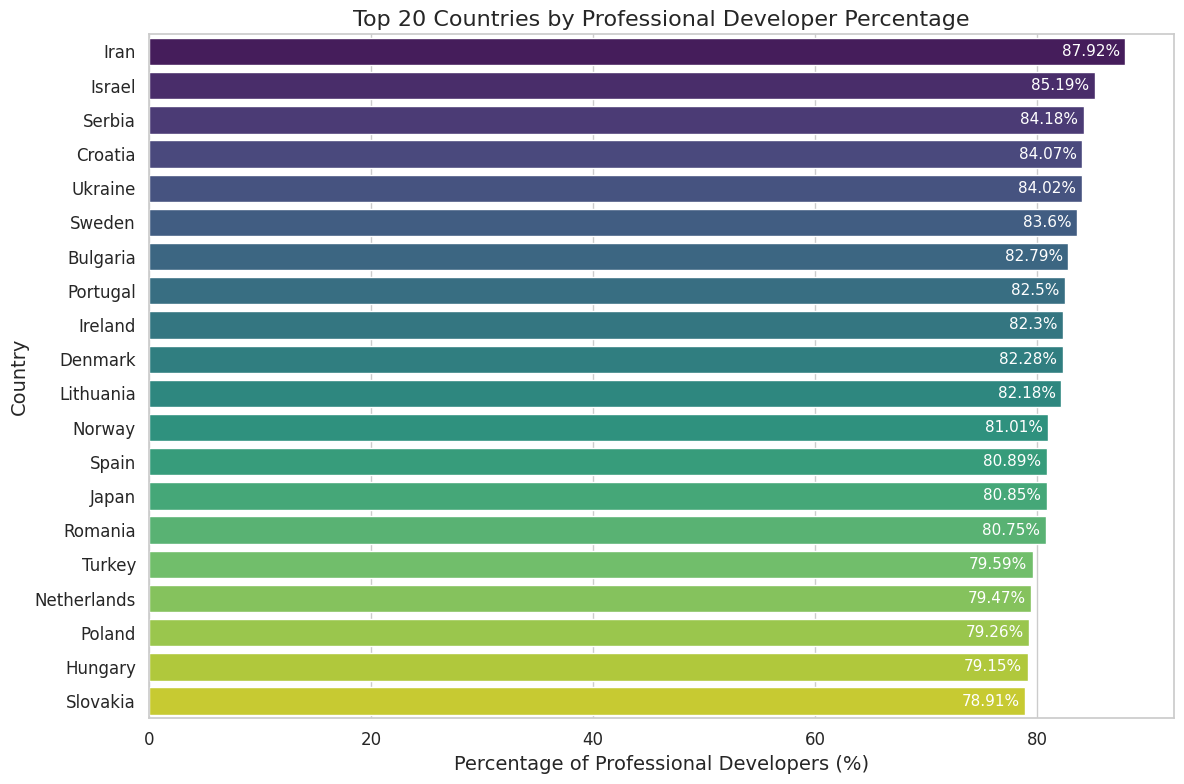

In [11]:
plt.figure(figsize=(12,8))
colors = sns.color_palette("viridis", len(top20_plot['Country']))
sns.barplot(
    data=top20_plot,
    x='percent_pro',
    y='Country',    
    palette=colors,
    hue='Country'
)

for index, value in enumerate(top20_plot['percent_pro']):
    plt.text(value - 0.5, index, f"{value}%", va='center', ha='right', fontsize=11, color='white')

plt.title('Top 20 Countries by Professional Developer Percentage')
plt.xlabel('Percentage of Professional Developers (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

>this plot showcase the top 20 counties which have atleast 100 respondents with highest percentage of repondents working as devs professionally

### What is the `age distribution` of developers worldwide?

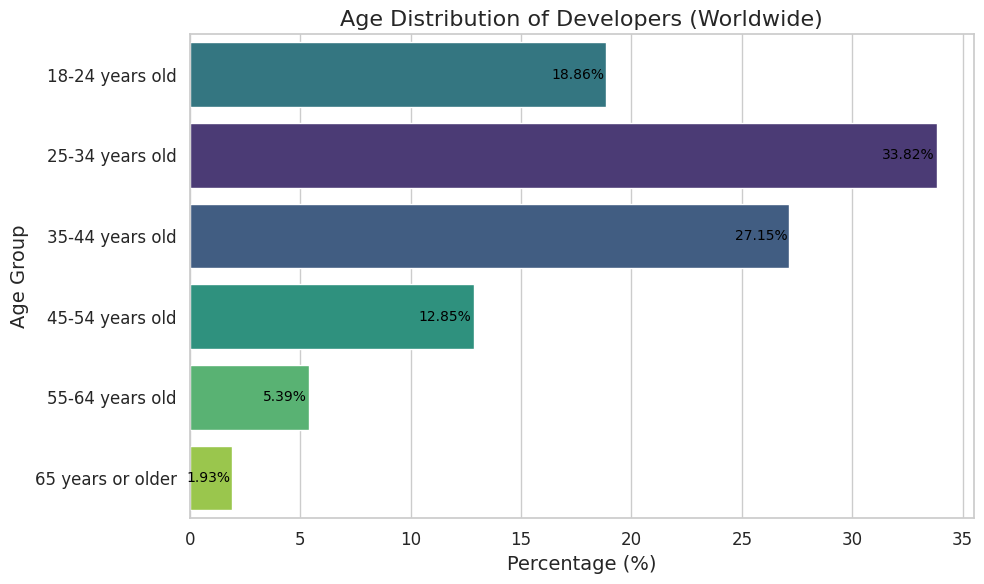

In [246]:
age_filtered = clean_df[clean_df["Age"] != "Prefer not to say"]
age_counts = age_filtered['Age'].value_counts().reset_index()
age_counts.columns = ['Age_Group', 'Count']
age_counts['Percent'] = round(age_counts['Count'] / age_counts['Count'].sum() * 100, 2)

order = [
    '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
colors = sns.color_palette("viridis", len(order))

plt.figure(figsize=(10,6))
sns.barplot(
    data=age_counts,
    x='Percent',
    y='Age_Group',
    order=order,
    palette=colors,
    hue='Age_Group'
)

# Add text labels
ordered_values = age_counts.set_index('Age_Group').loc[order]['Percent']

for idx, value in enumerate(ordered_values):
    plt.text(value-0.1, idx, f"{value}%", va='center', ha='right', fontsize=10, color="black")

plt.title("Age Distribution of Developers (Worldwide)")
plt.xlabel("Percentage (%)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

### What is the `Employed count` distribution across different `countries`?

In [13]:
total_country = clean_df.groupby(['Country'])['Employment'].size()

In [14]:
country_emp = clean_df[ clean_df['Employment'].isin(['Employed','Independent contractor, freelancer, or self-employed'])].groupby(['Country'])['Employment'].size()

In [15]:
employed_df = pd.DataFrame({
    'Employed': country_emp,
    'total_respondent': total_country
})
employed_df = employed_df.reset_index()
employed_df['Percent_employed'] = round(employed_df['Employed']/employed_df['total_respondent'] * 100, 2)
top20 = employed_df[employed_df['total_respondent']>=100].sort_values(['Percent_employed'], ascending=False).head(20)

In [16]:
colors=sns.color_palette('magma',len(top20['Country']))

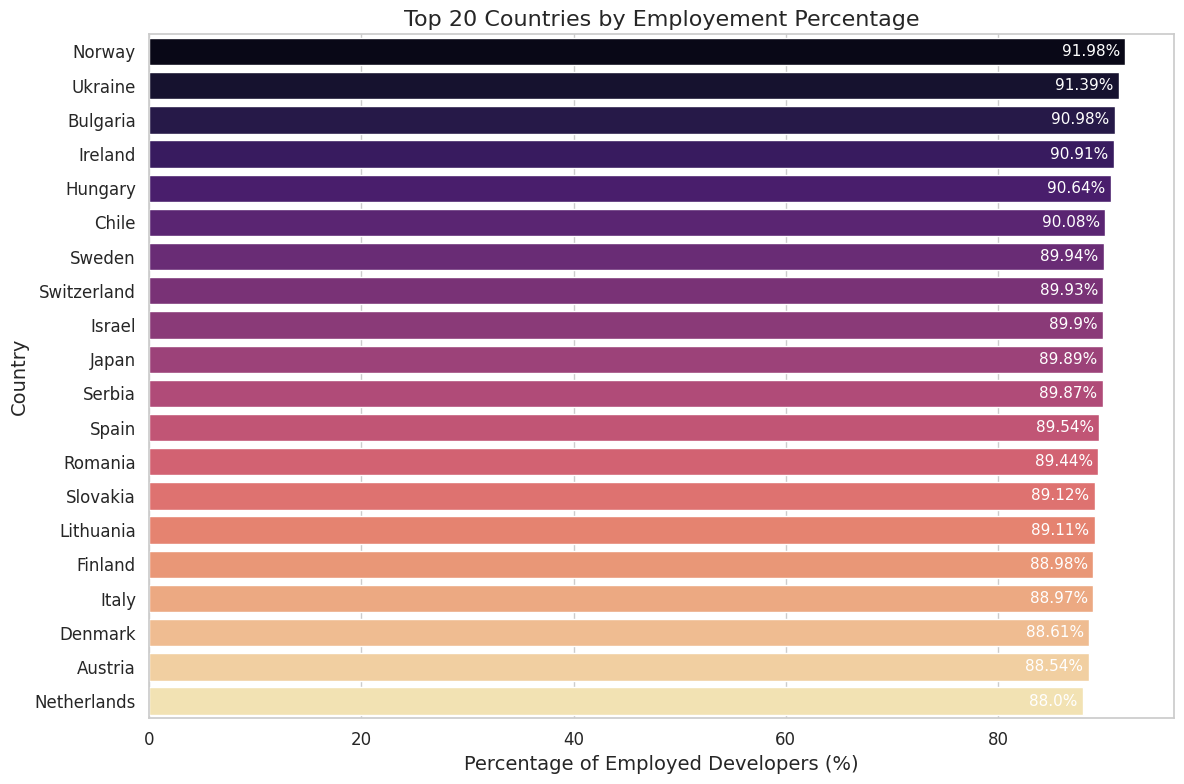

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=top20,
    x='Percent_employed',
    y='Country',
    palette=colors,
    hue='Country'
)

for index, value in enumerate(top20['Percent_employed']):
    plt.text(value - 0.5, index, f"{value}%", va='center', ha='right', fontsize=11, color='white')

plt.title('Top 20 Countries by Employement Percentage')
plt.xlabel('Percentage of Employed Developers (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

> this plot showcase the top 20 countries which have the most percentage of employeed devs

### What is the `Education level` distribution for all the `employed devs` from `India`?

In [18]:
edLevel_data = clean_df.loc[ (clean_df['Country'] == 'India') & (clean_df['Employment'].isin(['Employed','Independent contractor, freelancer, or self-employed'])), 'EdLevel'].value_counts(normalize=True) * 100

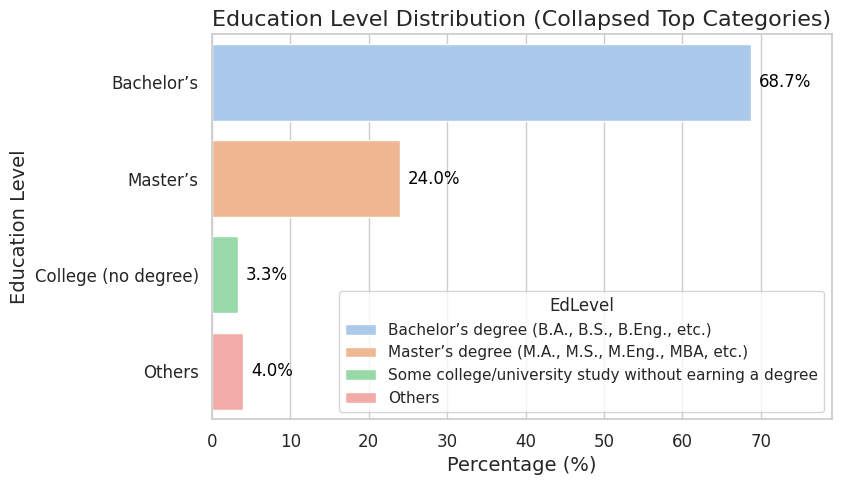

In [19]:
top_n = 3
top_data = edLevel_data.head(top_n)
others = edLevel_data.iloc[top_n:].sum()
top_data['Others'] = others
labels = ["Bachelor’s","Master’s","College (no degree)","Others"]

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_data.values, 
    y=labels,
    hue=top_data.index,
    palette='pastel'
)

for i, v in enumerate(top_data.values):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(top_data)*1.15)
plt.title("Education Level Distribution (Collapsed Top Categories)")
plt.xlabel("Percentage (%)")
plt.ylabel("Education Level")
plt.show()

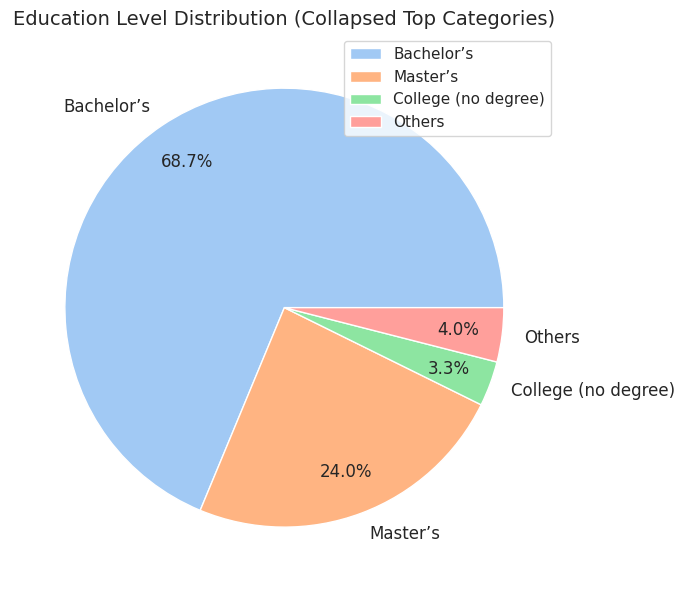

In [20]:
colors = sns.color_palette("pastel")[:4]  # soft, clean colors
plt.figure(figsize=(7,7))
plt.pie(
    top_data.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    pctdistance=0.8,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Education Level Distribution (Collapsed Top Categories)", fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Insights: 
- Most employed developers in India hold a Bachelor’s degree, making up nearly 70% of the group.
- Master’s degree holders form the second-largest segment at around 24%.
- All other education categories collectively account for less than 7%, indicating a highly degree-concentrated developer workforce.

### 2.2 Dev Experience

### Are `younger developers` entering the fields rely heavily on some few `learning methods`?

In [21]:
learn_method_counter = Counter()

In [22]:
for lm in clean_df.loc[(clean_df['Age'].isin(['18-24 years old'])), 'LearningMethods'].dropna().str.split(';'):
    learn_method_counter.update(lm)

In [23]:
learn_young_df = pd.DataFrame(list(dict(learn_method_counter).items()), columns=['Category','Count'])

In [24]:
learn_young_df['Percentage'] = (learn_young_df['Count']/learn_young_df['Count'].sum()) * 100

In [25]:
list(learn_young_df['Category'])

['Online Courses or Certification (includes all media types)',
 'AI CodeGen tools or AI-enabled apps',
 'Colleague or on-the-job training',
 'Blogs or podcasts',
 'Coding Bootcamp',
 'Other online resources (e.g. standard search, forum, online community)',
 'Books / Physical media',
 'Videos (not associated with specific online course or certification)',
 'Stack Overflow or Stack Exchange',
 'Technical documentation (is generated for/by the tool or system)',
 'Games or coding challenges',
 'School (i.e., University, College, etc)',
 'Others']

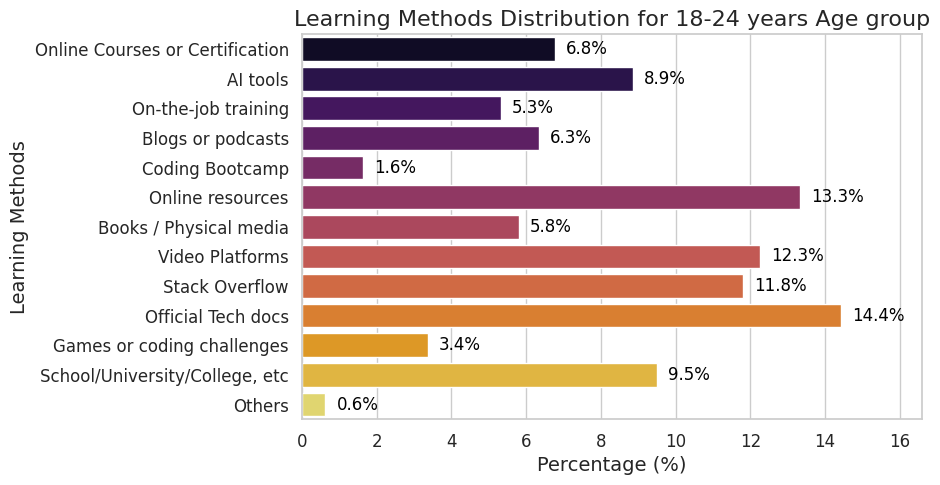

In [26]:
plt.figure(figsize=(8,5))
labels = ['Online Courses or Certification',
    'AI tools',
    'On-the-job training',
    'Blogs or podcasts',
    'Coding Bootcamp',
    'Online resources',
    'Books / Physical media',
    'Video Platforms',
    'Stack Overflow',
    'Official Tech docs',
    'Games or coding challenges',
    'School/University/College, etc',
    'Others']

ax = sns.barplot(
    x=learn_young_df['Percentage'],
    y=labels,
    hue=learn_young_df['Category'],
    palette='inferno'
)
ax.legend().remove()

for i, v in enumerate(learn_young_df['Percentage']):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(learn_young_df['Percentage'])*1.15)
plt.title("Learning Methods Distribution for 18-24 years Age group")
plt.xlabel("Percentage (%)")
plt.ylabel("Learning Methods")
plt.show()

### Insights:
- Learning methods are fairly `evenly distributed`, with no single method dominating the preferences of young developers.
- `Coding bootcamps` stand out as an outlier, used by only `1.6%` of young developers — noticeably lower compared to all other learning options.

### Does `Age` correlate to `job satisfaction`?

In [27]:
age_jobsat = clean_df.groupby(['Age'])['JobSat'].mean()
age_jobsat = age_jobsat[age_jobsat.index!='Prefer not to say']

In [28]:
age_jobsat_df = pd.DataFrame(age_jobsat.items(),columns=['Age', 'MeanJobsat'])
overall_mean = clean_df["JobSat"].mean()

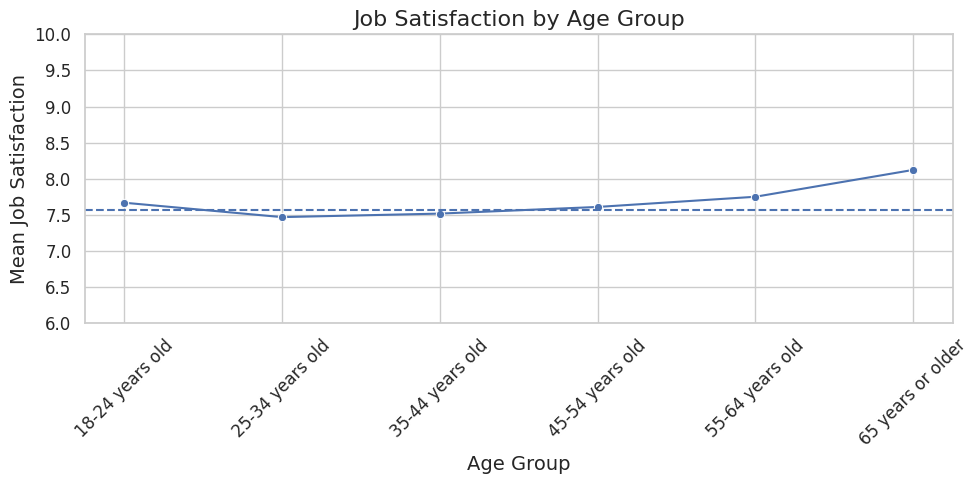

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=age_jobsat_df, x="Age", y="MeanJobsat", marker="o")

plt.axhline(overall_mean, linestyle="--")
plt.ylim(6, 10)
plt.title("Job Satisfaction by Age Group")
plt.ylabel("Mean Job Satisfaction")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights:

&emsp;Job satisfaction remains remarkably consistent across all age groups.  
&emsp;Even though there are minor fluctuations (e.g., slightly higher satisfaction in older groups), these differences are small   
&emsp;and practically insignificant. The line plot confirms that age does not meaningfully influence job satisfaction in this dataset.

### Which `Dev Role` show the highest likelihood of accepting `newer devs`?

In [247]:
young_devtype = clean_df[(clean_df['Age'] == '18-24 years old') & ~clean_df['DevType'].isin(['Student','Others'])]['DevType'].value_counts()

In [248]:
young_devtype_df = pd.DataFrame(young_devtype.items(),columns=['DevType','count'])
young_devtype_df['Percent'] = (young_devtype_df['count']/young_devtype_df['count'].sum()) * 100

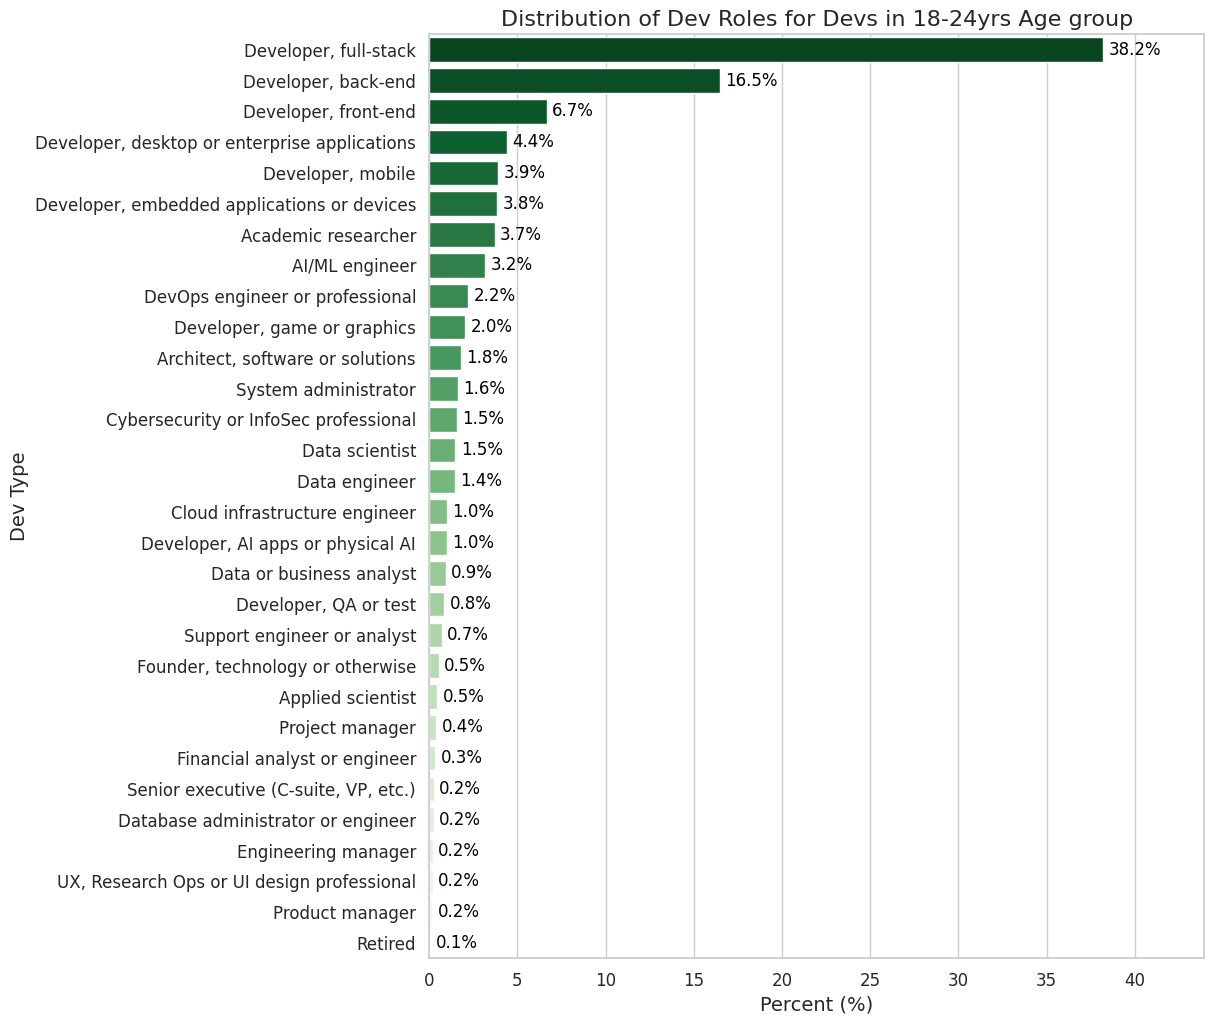

In [249]:
palette = sns.color_palette("Greens", n_colors=len(young_devtype_df))
palette = palette[::-1]

plt.figure(figsize=(10, 12))
sns.barplot(
    data=young_devtype_df.sort_values('Percent', ascending=False),
    y='DevType',
    x='Percent',
    hue='DevType',
    palette=palette
)

for i, v in enumerate(young_devtype_df['Percent']):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(young_devtype_df['Percent'])*1.15)
plt.xlabel('Percent (%)')
plt.ylabel('Dev Type')
plt.title('Distribution of Dev Roles for Devs in 18-24yrs Age group')
plt.show()

### Insights:  
  
&emsp;A significant share of young developers work in full-stack, front-end, or back-end roles,  
&emsp;which together account for 61.4% of the group.  
&emsp;This indicates that these domains remain the most common entry-level pathways for early-career developers.

### How `coding experience` correlates to salary?

In [33]:
code_salary = clean_df.loc[(clean_df['AnnualSalary(USD)'].notna()), ['YearsCode','AnnualSalary(USD)']].groupby('YearsCode')['AnnualSalary(USD)'].mean()

In [34]:
code_salary_df = pd.DataFrame(code_salary.items(),columns=['YearsCode','AvgSalary'])
code_salary_df['AvgSalary'] = round(code_salary_df['AvgSalary'], 2)
clean_code_salary_df = code_salary_df[code_salary_df['YearsCode'] <= 60]
mean_salary = clean_df['AnnualSalary(USD)'].dropna().mean()

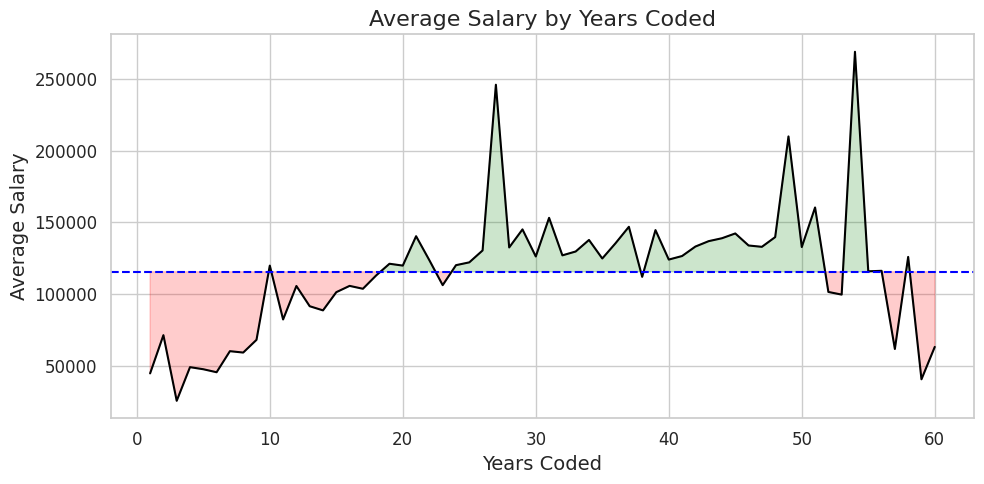

In [36]:
plt.figure(figsize=(10,5))
x = clean_code_salary_df['YearsCode']
y = clean_code_salary_df['AvgSalary']
mean_salary = y.mean()

ax = sns.lineplot(data=clean_code_salary_df, x="YearsCode", y="AvgSalary", label='Avg Salary', color='black')
plt.axhline(mean_salary, linestyle="--", label='Mean Salary', color='blue')

plt.fill_between(x, y, mean_salary,
                 where=(y > mean_salary),interpolate=True,
                 color="green", alpha=0.2, label="Above Mean")
plt.fill_between(x, y, mean_salary,
                 where=(y < mean_salary),interpolate=True,
                 color="red", alpha=0.2, label="Below Mean")

ax.legend().remove()
plt.title("Average Salary by Years Coded")
plt.ylabel("Average Salary")
plt.xlabel("Years Coded")
plt.tight_layout()
plt.show()

### Insights: 
   
&emsp;The average salary stays consistently below the survey-wide mean annual salary ($115,665.58)   
&emsp;for respondents with less than 20 years of experience.  
&emsp;Beyond the 20-year mark, the average salary remains consistently above the mean, and the gap increases noticeably as experience grows.

### Are certain `Industries` more dominated by `more experienced` workers?

In [250]:
industry_exp_df = pd.DataFrame((clean_df.groupby(['Industry'])['WorkExp'].mean()).items(), columns=['Industry','AvgWorkExp'])

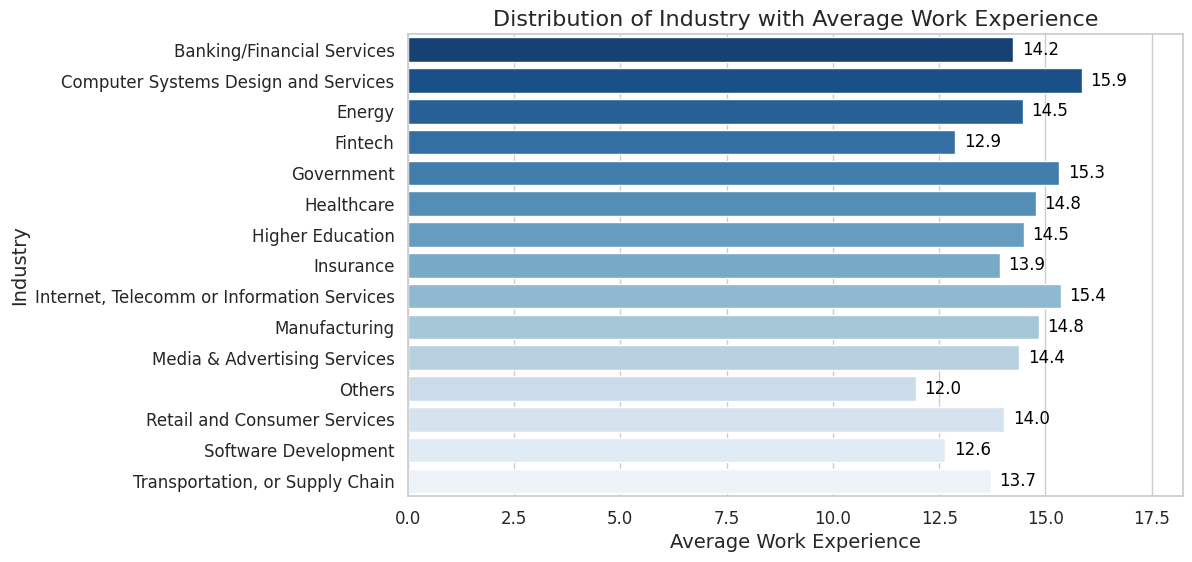

In [251]:
palette = sns.color_palette("Blues", n_colors=len(industry_exp_df))
palette = palette[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=industry_exp_df,
    y='Industry',
    x='AvgWorkExp',
    hue='Industry',
    palette=palette
)

for i, v in enumerate(industry_exp_df['AvgWorkExp']):
    plt.text(v + 0.2, i, f"{v:.1f}", va='center', color='black')

plt.xlim(0, max(industry_exp_df['AvgWorkExp'])*1.15)
plt.xlabel('Average Work Experience')
plt.ylabel('Industry')
plt.title('Distribution of Industry with Average Work Experience')
plt.show()

### Insights:

The average work exp has an even distribution across different industries showcasing no single industry is dominated by devs with  
more or less work experience respectively.

### What is the Distribution of respondents `considered or transitioned into a new career`?

In [39]:
newrole_df = pd.DataFrame((clean_df['NewRole'].value_counts()).items(), columns=['role_change','count'])
newrole_df = newrole_df[newrole_df['role_change'] != 'Prefer not to say']

In [40]:
og_df = pd.DataFrame((clean_df['NewRole'].value_counts()).items(), columns=['role_change','count'])
og_df = og_df[og_df['role_change'] != 'Prefer not to say']

In [41]:
new_label = "I have considered or transitioned into a new career"

mask = ~newrole_df['role_change'].str.contains('neither', case=False, na=False)
newrole_df.loc[mask, 'role_change'] = new_label
df2 = newrole_df.groupby('role_change', as_index=False)['count'].sum().sort_values('count', ascending=False)
df2

,role_change,count
0,I have considered or transitioned into a new c...,19299
1,I have neither consider or transitioned into a...,16192


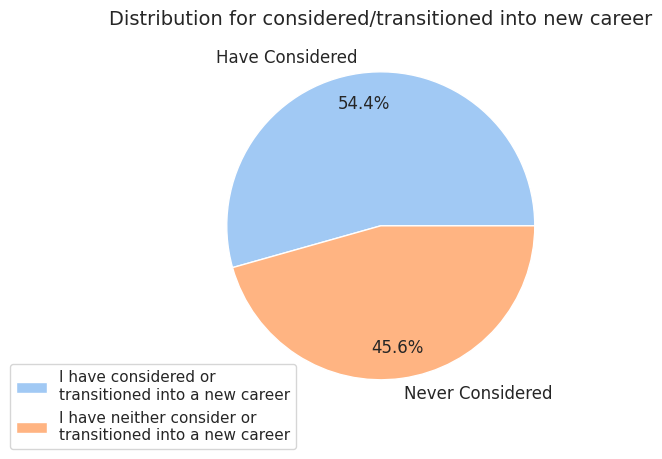

In [42]:
colors = sns.color_palette("pastel")[:2]
labels = ['Have Considered','Never Considered']

plt.figure(figsize=(5,5))
plt.pie(
    df2['count'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    pctdistance=0.8,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Distribution for considered/transitioned into new career", fontsize=14)
plt.legend(['I have considered or\ntransitioned into a new career',
            'I have neither consider or\ntransitioned into a new career'],loc='best', bbox_to_anchor=(0.3, 0.16))
plt.show()

### Insights:  

The distribution between professionals who have considered or transitioned into a new career and those who have never considered doing so is nearly even. This indicates that both career stability and career change are equally common paths. In other words, neither behavior is unusual & professionals are almost equally split between staying in their existing career and exploring or pursuing new options.


### 2.3 Technology Stack

### What are the most used `Communication platforms` used by Developers in 2025?

In [43]:
platformCounter = Counter()

In [44]:
for lm in clean_df['CommPlatformHaveWorkedWith'].dropna().str.split(";"):
    platformCounter.update(lm)

In [45]:
platformDict = dict(platformCounter)

In [46]:
rename_map = {
    'GitHub (public projects, not private repos)': 'Github',
    'Slack (public channels, not work)': 'Slack'
}

In [47]:
for old,new in rename_map.items():
    if old in platformDict:
        platformDict[new] = platformDict.pop(old)

In [48]:
platform_df = pd.DataFrame(list(platformDict.items()), columns=['Platform','Count'])
platform_df = platform_df.sort_values(['Count'],ascending=False).reset_index(drop=True)
platform_df['Percent'] = round(platform_df['Count']/platform_df['Count'].sum() * 100, 2)

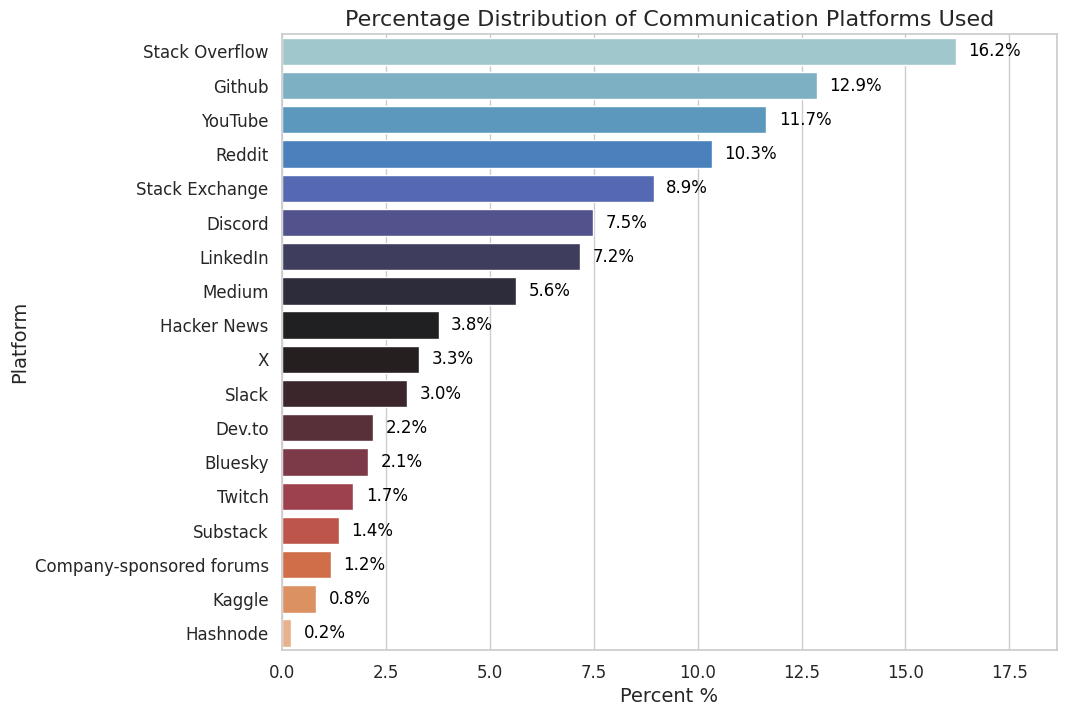

In [49]:
palette = sns.color_palette("icefire", n_colors=len(platform_df))
# palette = palette[::-1]

plt.figure(figsize=(10, 8))
sns.barplot(
    data=platform_df,
    y='Platform',
    x='Percent',
    hue='Platform',
    palette=palette
)

for i, v in enumerate(platform_df['Percent']):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(platform_df['Percent'])*1.15)
plt.xlabel('Percent %')
plt.ylabel('Platform')
plt.title('Percentage Distribution of Communication Platforms Used')
plt.show()

### Insights

- The platform distribution shows **Stack Overflow** as the most frequently used platform. This is expected and may be somewhat biased, given that the dataset originates from the Stack Overflow Developer Survey.
- Excluding Stack Overflow, the next most used platforms are:
  - **GitHub – 12.9%**
  - **YouTube – 11.7%**
  - **Reddit – 10.3%**
- Combined, these three platforms account for **approximately 35%** of all platform mentions, indicating that developers rely heavily on a mix of code hosting, video learning, and community-driven discussion platforms.

### Most common `Programming Languages` used by Devs in 2025?

In [50]:
langCounter = Counter()
for lm in clean_df['LanguageHaveWorkedWith'].dropna().str.split(";"):
    langCounter.update(lm)

langDict = dict(langCounter)

lang_df = pd.DataFrame(list(langDict.items()), columns=['Language','Count'])
lang_df = lang_df.sort_values(['Count'],ascending=False).reset_index(drop=True)
lang_df['Percent'] = round(lang_df['Count']/lang_df['Count'].sum() * 100, 2)

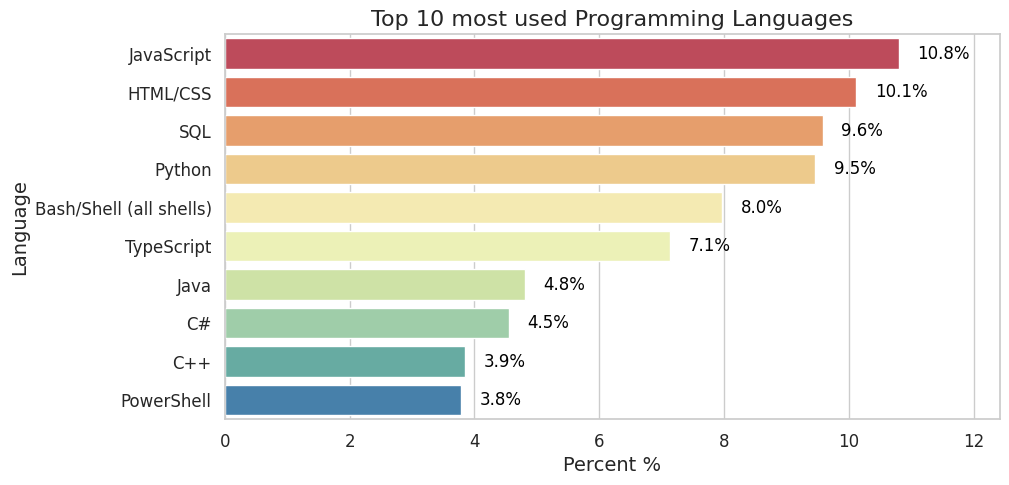

In [51]:
palette = sns.color_palette("Spectral", n_colors=len(lang_df.head(10)))

plt.figure(figsize=(10, 5))
sns.barplot(
    data=lang_df.head(10),
    y='Language',
    x='Percent',
    hue='Language',
    palette=palette
)

for i, v in enumerate(lang_df['Percent'].head(10)):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(lang_df['Percent'].head(10))*1.15)
plt.xlabel('Percent %')
plt.ylabel('Language')
plt.title('Top 10 most used Programming Languages')
plt.show()

### Insights:

&emsp;The distribution shows that `web technologies` (`JavaScript`, `HTML/CSS`, `TypeScript` with a total of `28%`) and  
&emsp;`data/automation technologies` (`Python`, `SQL`, `Bash` with a toal of `27.1%`) dominate the landscape, reflecting modern developer workflows.  
&emsp;Compiled, strongly typed languages(`Java`, `C#`, `C++`) remain important but are now secondary in overall usage volume within this dataset.

### Most Common `Development Platforms` used by devs in 2025?

In [52]:
platformCounter = Counter()
for lm in clean_df['PlatformHaveWorkedWith'].dropna().str.split(";"):
    platformCounter.update(lm)

platformDict = dict(platformCounter)

platform_df = pd.DataFrame(list(platformDict.items()), columns=['Platform','Count'])
platform_df = platform_df.sort_values(['Count'],ascending=False).reset_index(drop=True)
platform_df['Percent'] = round(platform_df['Count']/platform_df['Count'].sum() * 100, 2)

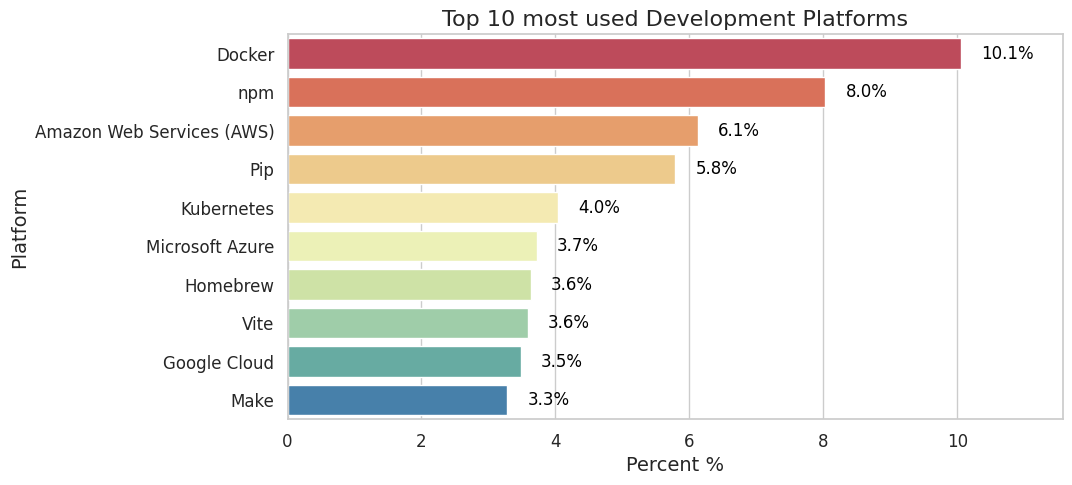

In [53]:
palette = sns.color_palette("Spectral", n_colors=len(platform_df.head(10)))

plt.figure(figsize=(10, 5))
sns.barplot(
    data=platform_df.head(10),
    y='Platform',
    x='Percent',
    hue='Platform',
    palette=palette
)

for i, v in enumerate(platform_df['Percent'].head(10)):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(platform_df['Percent'].head(10))*1.15)
plt.xlabel('Percent %')
plt.ylabel('Platform')
plt.title('Top 10 most used Development Platforms')
plt.show()

### Insights:

The data highlights a development ecosystem centered around a few dominant categories of tools.  
- `Containers` (`Docker` + `Kubernetes`) account for `14.1%` of all mentions, reflecting their critical role in modern DevOps and deployment workflows.    
- `Package managers` such as `npm` and `pip` contribute another `13.8%`, driven by the strong influence of JavaScript and Python ecosystems.   
- `Cloud platforms` (`AWS`, `Azure`, `GCP`) collectively represent `13.3%`, indicating widespread use of cloud services across development teams.      

Overall, Docker stands out as the single most-used tool, and the results show a balanced mix of modern DevOps tooling, cloud infrastructure, and   
foundational ecosystem & package managers.

### Most Common `Databases` used in 2025?

In [54]:
DatabaseCounter = Counter()
for lm in clean_df['DatabaseHaveWorkedWith'].dropna().str.split(";"):
    DatabaseCounter.update(lm)

DatabaseDict = dict(DatabaseCounter)

Database_df = pd.DataFrame(list(DatabaseDict.items()), columns=['Database','Count'])
Database_df = Database_df.sort_values(['Count'],ascending=False).reset_index(drop=True)
Database_df['Percent'] = round(Database_df['Count']/Database_df['Count'].sum() * 100, 2)

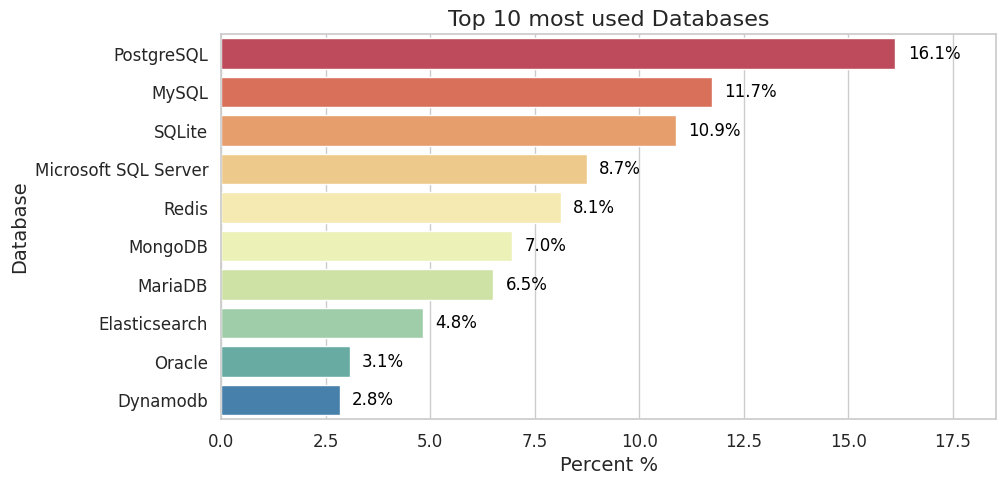

In [55]:
palette = sns.color_palette("Spectral", n_colors=len(Database_df.head(10)))

plt.figure(figsize=(10, 5))
sns.barplot(
    data=Database_df.head(10),
    y='Database',
    x='Percent',
    hue='Database',
    palette=palette
)

for i, v in enumerate(Database_df['Percent'].head(10)):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(Database_df['Percent'].head(10))*1.15)
plt.xlabel('Percent %')
plt.ylabel('Database')
plt.title('Top 10 most used Databases')
plt.show()

### Insights

&emsp;The distribution shows a strong preference for `relational databases`, which collectively account for `57.1%` of all mentions.   
&emsp;PostgreSQL leads the list with `16.1%`, reflecting its reputation for reliability, performance, and developer-friendly features.  
&emsp;`MySQL (11.7%)` and `SQLite (10.9%)` follow, indicating continued relevance across web, embedded, and lightweight development environments.

&emsp;`NoSQL databases` make up `22.7%` of the usage. `Redis (8.1%)` and `MongoDB (7%)` dominate this group,  
&emsp;highlighting their roles in caching, real-time applications, and flexible document storage.  
&emsp;`Elasticsearch (4.8%)` and `DynamoDB (2.8%)` round out the category, representing search-focused and cloud-native NoSQL options.


### 2.4 Workplace behavior


### Does `Mode of work` affect `Job Satisfaction`?

In [56]:
workMode_jobsat = clean_df.groupby(['RemoteWork'])['JobSat'].mean()
workMode_jobsat_df = pd.DataFrame(workMode_jobsat.items(), columns=['WorkMode','AvgJobSat'])
workMode_jobsat_df = workMode_jobsat_df[~(workMode_jobsat_df['WorkMode'] == 'Prefer not to say')]

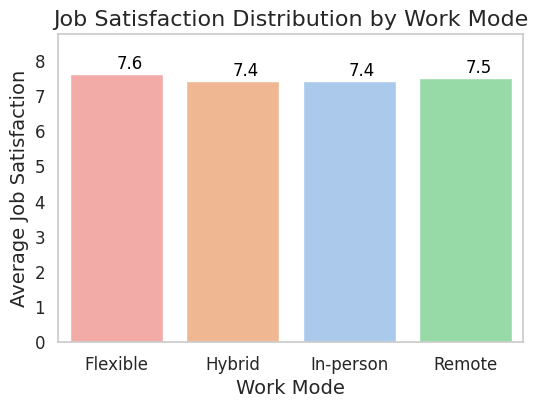

In [57]:
palette = sns.color_palette("pastel", n_colors=len(workMode_jobsat_df))

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=workMode_jobsat_df,
    y='AvgJobSat',
    x='WorkMode',
    hue='AvgJobSat',
    palette=palette
)

ax.legend().remove()
ax.grid(visible=False)

for i, v in enumerate(workMode_jobsat_df['AvgJobSat']):
    plt.text(i, v + 0.3, f"{v:.1f}", va='center', color='black')

plt.ylim(0, max(workMode_jobsat_df['AvgJobSat'])*1.15)
plt.xlabel('Work Mode')
plt.ylabel('Average Job Satisfaction')
plt.title('Job Satisfaction Distribution by Work Mode')
plt.show()

### Insights:  

&emsp;The `average job satisfaction` across different `work modes` is nearly identical, with a variation of only about `0.2`.    
&emsp;This indicates that work mode does not significantly influence job satisfaction.

### What is the Most Common `work mode` for each `industry`?

In [58]:
counts = clean_df.groupby(['Industry', 'RemoteWork']).size().reset_index(name='Count')
counts['Percent'] = counts['Count'] / counts.groupby('Industry')['Count'].transform('sum') * 100
most_common = counts.loc[counts.groupby('Industry')['Count'].idxmax()]
most_common = most_common[~(most_common['Industry'] == 'Others')]

### Most Common Work Mode by Industry

| Industry                                           | Most Common Mode | Count | Percentage |
|----------------------------------------------------|------------------|-------|------------|
| Banking / Financial Services                       | Hybrid           | 658   | 45.92%     |
| Computer Systems Design and Services               | Hybrid           | 320   | 35.79%     |
| Energy                                             | Hybrid           | 315   | 42.57%     |
| Fintech                                            | Remote           | 593   | 35.19%     |
| Government                                         | Hybrid           | 453   | 38.29%     |
| Healthcare                                         | Hybrid           | 490   | 35.15%     |
| Higher Education                                   | Hybrid           | 477   | 40.94%     |
| Insurance                                          | Hybrid           | 198   | 45.73%     |
| Internet / Telecom / Information Services          | Hybrid           | 593   | 34.94%     |
| Manufacturing                                      | Hybrid           | 524   | 39.88%     |
| Media & Advertising Services                       | Remote           | 266   | 34.41%     |
| Retail and Consumer Services                       | Hybrid           | 350   | 33.24%     |
| Software Development                               | Remote           | 5379  | 33.07%     |
| Transportation / Supply Chain                      | Hybrid           | 346   | 38.02%     |


### Insights:

- Across all major industries, Hybrid work dominates as the most common mode, appearing as the top preference in 11 out of 14 industries.  
- Industries with a strong remote preference include `Fintech`, `Media & Advertising`, and especially `Software Development`, where Remote work leads by a large margin.  
- Percentages generally cluster between 33–46%, indicating that most industries do not overwhelmingly favor a single work mode,  
but Hybrid tends to have a consistent slight lead.

### 2.5 Salary and Earnings

### How does `average salary` vary across `countries`?

In [59]:
country_counts = clean_df['Country'].value_counts()
valid_countries = country_counts[country_counts >= 100].index
filtered_mean_salary = (
    clean_df[clean_df['Country'].isin(valid_countries)]
    .groupby('Country')['AnnualSalary(USD)']
    .mean()
)

salary_country_df = pd.DataFrame(filtered_mean_salary.items(), columns=['Country','AverageSalary'])
salary_country_df['AverageSalary'] = round(salary_country_df['AverageSalary'], 2)
salary_country_df = salary_country_df.sort_values(['AverageSalary'],ascending=False).reset_index(drop=True)
salary_country_df_top20 = salary_country_df.head(20)

salary_country_df_top20.loc[: ,'Country'] = (salary_country_df_top20['Country'].str.replace(
    r',.*', '', regex=True
))
salary_country_df_top20.loc[: ,'Country'] = salary_country_df_top20['Country'].replace(
    "United Kingdom of Great Britain and Northern Ireland",
    "United Kingdom"
)

salary_country_df_top20.loc[: ,'Country'] = salary_country_df_top20['Country'].replace(
    "United States of America",
    "United States"
)

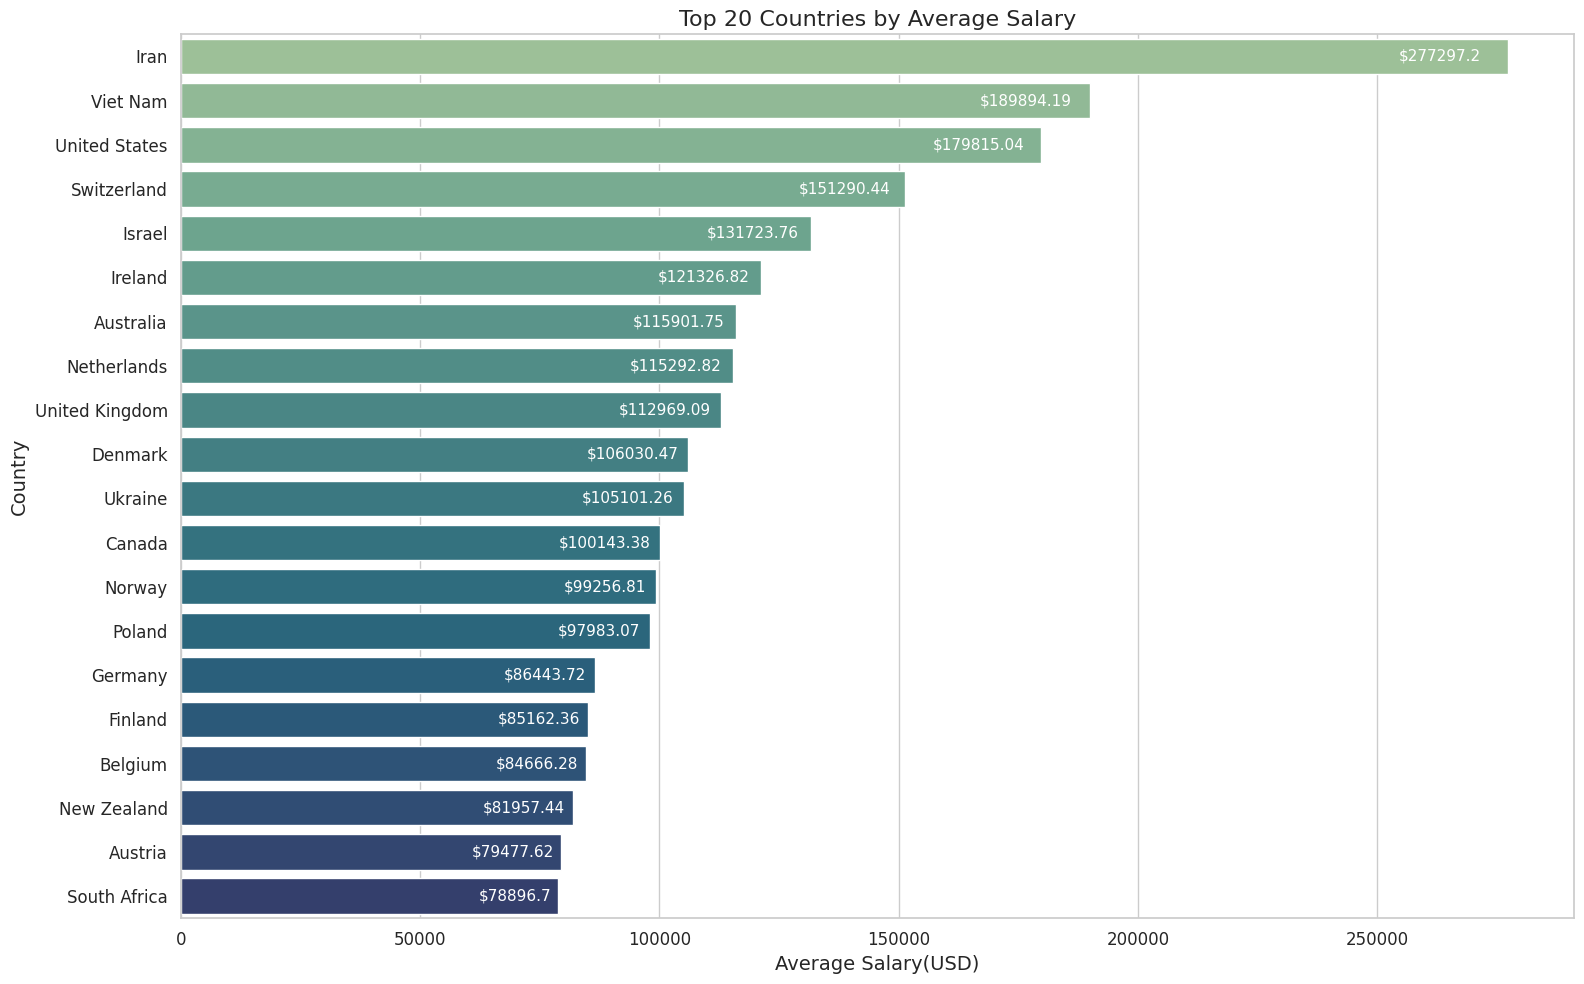

In [60]:
palette = sns.color_palette("crest", n_colors=len(salary_country_df_top20))
plt.figure(figsize=(16,10))
sns.barplot(
    data=salary_country_df_top20,
    x='AverageSalary',
    y='Country',
    palette=palette,
    hue='Country'
)

for index, value in enumerate(salary_country_df_top20['AverageSalary']):
    plt.text(value* 0.98, index, f"${value}", va='center', ha='right', fontsize=11, color='white')

plt.title('Top 20 Countries by Average Salary')
plt.xlabel('Average Salary(USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

> this plot showcase the top 20 countries with the highest average salary paid to a dev

### Does `education level` still correlate with `salary` in 2025—or is experience more important?

In [ ]:
counts = clean_df['WorkExp'].value_counts()
valid_exp = counts[counts >= 100].index
filtered_exp_df = clean_df[clean_df['WorkExp'].isin(valid_exp)]
exp_salary_df = filtered_exp_df.groupby(['WorkExp'])['AnnualSalary(USD)'].mean().reset_index().sort_values('WorkExp')

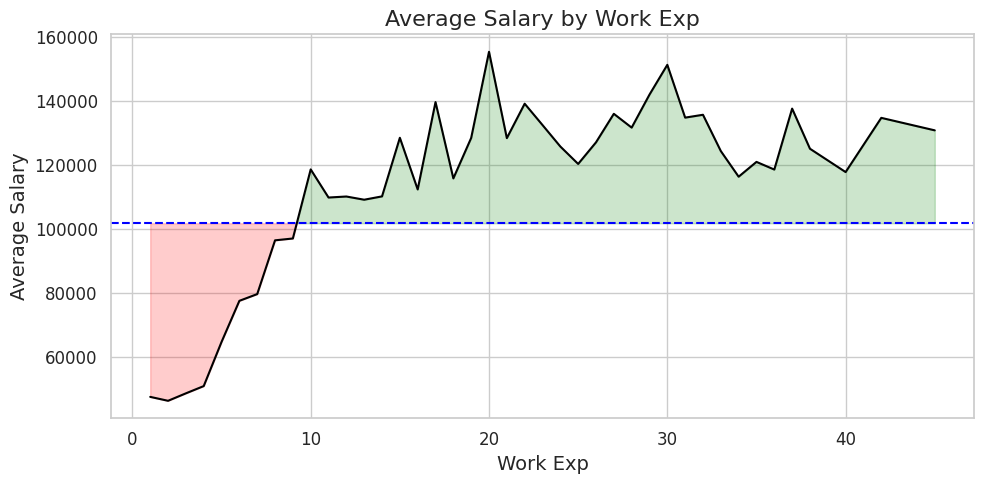

In [ ]:
plt.figure(figsize=(10,5))
x = exp_salary_df['WorkExp']
y = exp_salary_df['AnnualSalary(USD)']
mean_salary = clean_df['AnnualSalary(USD)'].mean()

ax = sns.lineplot(data=exp_salary_df, x="WorkExp", y="AnnualSalary(USD)", label='Avg Salary', color='black')
plt.axhline(mean_salary, linestyle="--", label='Mean Salary', color='blue')

plt.fill_between(x, y, mean_salary,
                 where=(y > mean_salary),interpolate=True,
                 color="green", alpha=0.2, label="Above Mean")
plt.fill_between(x, y, mean_salary,
                 where=(y < mean_salary),interpolate=True,
                 color="red", alpha=0.2, label="Below Mean")

ax.legend().remove()
plt.title("Average Salary by Work Exp")
plt.ylabel("Average Salary")
plt.xlabel("Work Exp")
plt.tight_layout()
plt.show()

In [252]:
filtered_Ed_level = clean_df[~clean_df['EdLevel'].isin(['Others','Primary/elementary school'])]
salary_education_df = filtered_Ed_level.groupby(['EdLevel'])['AnnualSalary(USD)'].mean().reset_index().sort_values('AnnualSalary(USD)',ascending=False)
salary_education_df['AnnualSalary(USD)'] = round(salary_education_df['AnnualSalary(USD)'],2)

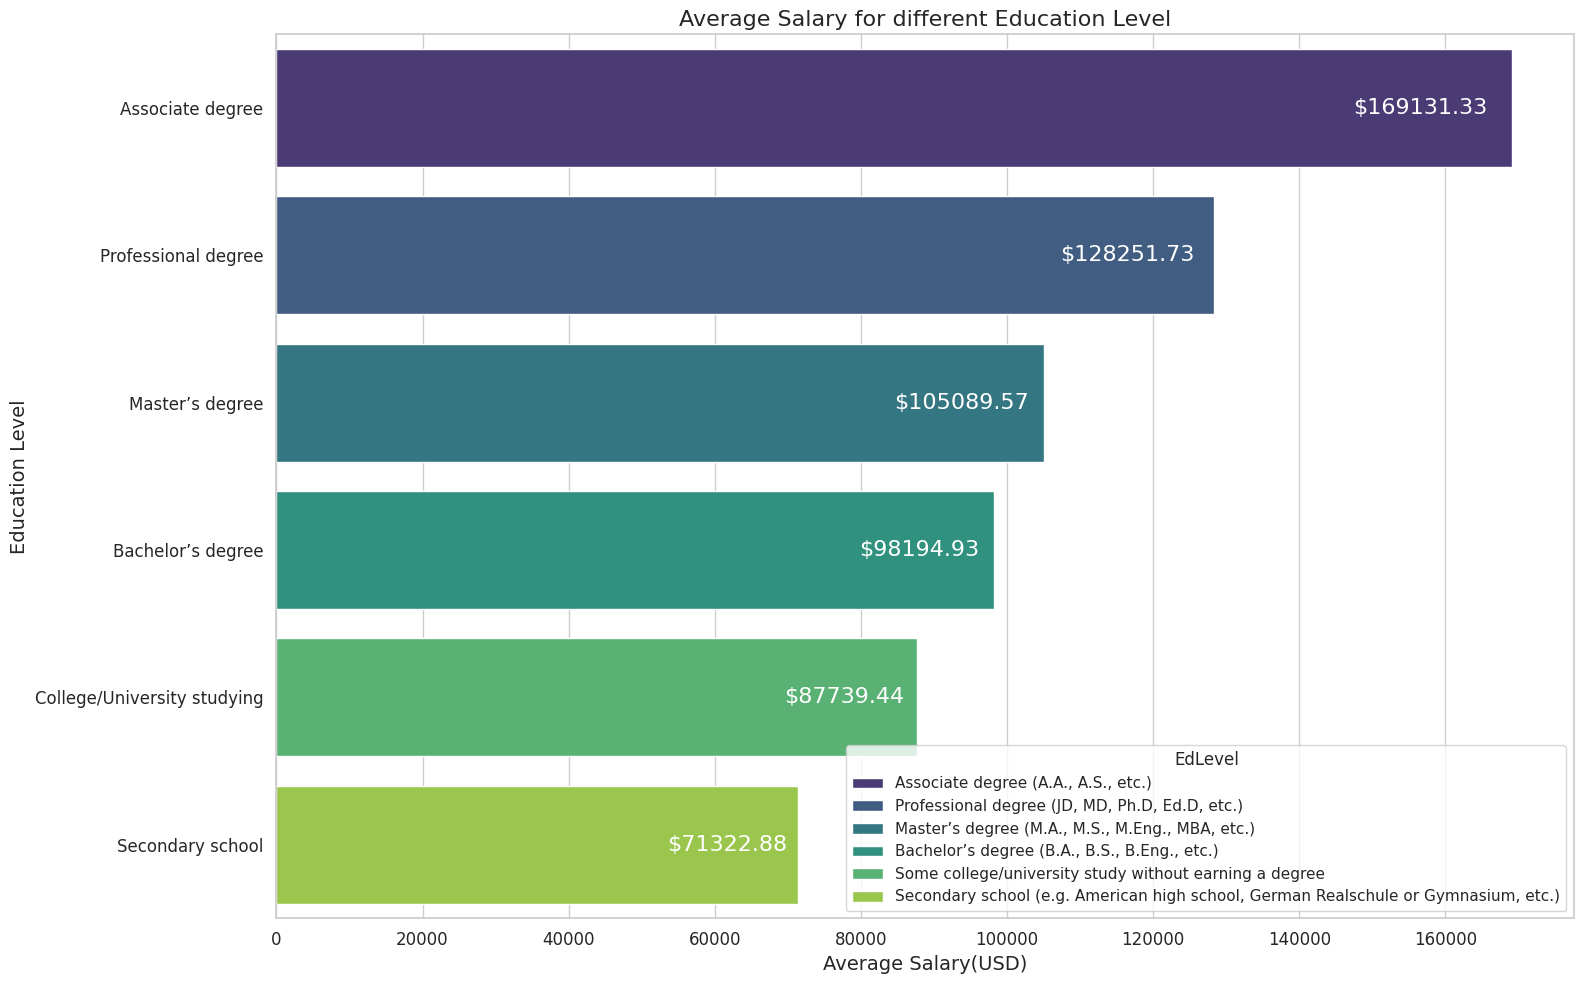

In [254]:
palette = sns.color_palette("viridis", n_colors=len(salary_education_df))
labels=['Associate degree', 'Professional degree',
        'Master’s degree', 'Bachelor’s degree',
        'College/University studying','Secondary school']
plt.figure(figsize=(16,10))
sns.barplot(
    data=salary_education_df,
    x='AnnualSalary(USD)',
    y=labels,
    palette=palette,
    hue='EdLevel',
)

for index, value in enumerate(salary_education_df['AnnualSalary(USD)']):
    plt.text(value* 0.98, index, f"${value}", va='center', ha='right', fontsize=16, color='white')

plt.title('Average Salary for different Education Level')
plt.xlabel('Average Salary(USD)')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

### Insights

### 1. Work Experience and Salary
The analysis shows a strong positive correlation between work experience and average annual salary.  
In the early-career range, the salary curve rises sharply, indicating that the initial years of experience contribute the most rapid salary growth.  
Beyond approximately **9 years of experience**, the average salary remains consistently above the overall field average.  
This highlights the importance of accumulating experience, especially during the early stages of one’s career.

### 2. Education Level and Salary
Education level also shows a generally positive relationship with salary, but the differences between degree levels are relatively small in this survey sample.  
Notably, individuals with **Associate degrees** appear to have the highest average salary in the dataset.  
However, this is best explained by **selection bias**: Associate degree holders in this survey tend to work in highly specialized, high-paying technical roles, whereas Bachelor’s and Master’s degree holders are a much larger and more diverse group—including many juniors and respondents from lower-income regions—which lowers their overall average.

### Conclusion
Overall, **work experience** is the strongest determinant of salary growth, particularly during the first decade of one’s career.  
Additionally, entering a **specialized, high-demand field** early on can lead to higher earnings regardless of the degree level.  
This suggests that both **accumulated experience** and the **choice of field** play crucial roles in achieving higher-paying job outcomes.


### 2.6 AI usage and sentiment

### What are the most common `usecases` for using `AI tools`?

In [ ]:
AIusageCounter = Counter()
for lm in clean_df['AIToolCurrently_partially_AI'].dropna().str.split(";"):
    AIusageCounter.update(lm)

AIusecase_df = pd.DataFrame(dict(AIusageCounter).items(), columns=['AIUsecase','Count'])
AIusecase_df['Percent'] = round(AIusecase_df['Count']/AIusecase_df['Count'].sum() * 100, 2)
AIusecase_df = AIusecase_df.sort_values(['Percent'],ascending=False)

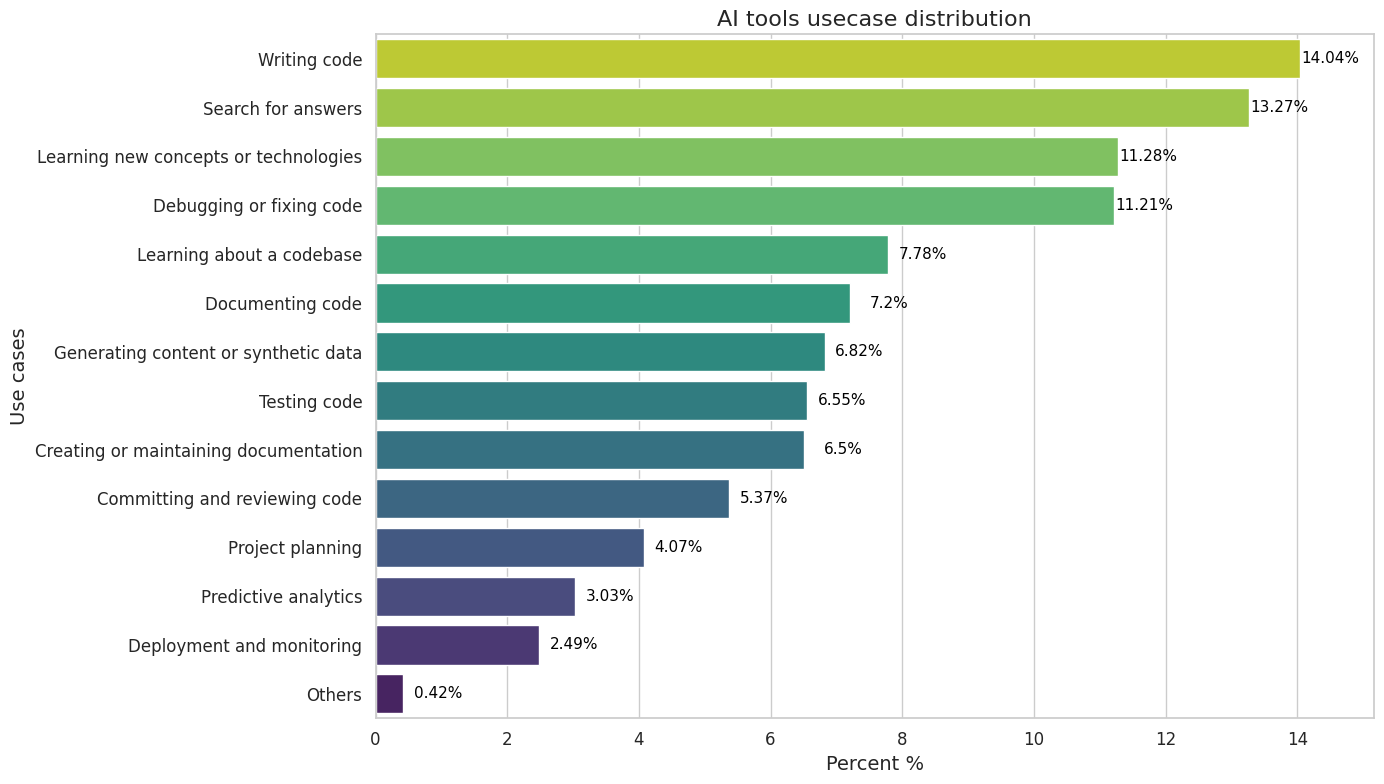

In [190]:
palette = sns.color_palette("viridis", n_colors=len(AIusecase_df))
palette = palette[::-1]
plt.figure(figsize=(14,8))
sns.barplot(
    data=AIusecase_df,
    x='Percent',
    y='AIUsecase',
    palette=palette,
    hue='AIUsecase'
)

for index, value in enumerate(AIusecase_df['Percent']):
    plt.text(value + 0.9, index, f"{value}%", va='center', ha='right', fontsize=11, color='black')

plt.xlim(0, max(AIusecase_df['Percent'].head(10))*1.08)
plt.title('AI tools usecase distribution')
plt.xlabel('Percent %')
plt.ylabel('Use cases')
plt.tight_layout()
plt.show()

### Insights:

- AI is primarily used for core coding tasks `Writing code – 14.04%`, `Searching for answers – 13.27%` &   
`Learning new concepts/technologies – 11.28%` for combined ***38.59%***  
which shows that AI serves as a real-time coding assistant, helping developers write and understand code faster.

- Debugging is a major use case which includes: `Debugging/fixing code – 11.21%` & `Testing code – 6.55%`  
for combined ***17.76%*** reflects high trust in AI for troubleshooting and error resolution.

- Documentation tasks: `Documenting code – 7.20%`, `Creating/maintaining documentation – 6.50%` &  
`Generating content/synthetic data – 6.82%` for combined ***14.02%*** highlights AI usage in repetitive, low-engagement tasks.

- Low adoption in production, analytics, and planning includes: `Project planning – 4.07%`,      
`Predictive analytics – 3.03%`  & `Deployment & monitoring – 2.49%` for combined ***9.59%***  
indicates devs still rely on established tools and human oversight for mission-critical tasks.

### What is the `common sentiment` of devs towards `AI usage` in work life?

In [ ]:
aisentiment = clean_df[~(clean_df['AISentiment'] == 'Unsure')]['AISentiment'].value_counts()
aisentiment_df = pd.DataFrame(aisentiment.items(), columns=['Sentiment','Count'])
aisentiment_df['Percent'] = round(aisentiment_df['Count']/aisentiment_df['Count'].sum() * 100, 2)

In [ ]:
sentiment_order = [
    "Very favorable",
    "Favorable",
    "Indifferent",
    "Unfavorable",
    "Very unfavorable"
]

aisentiment_df['Sentiment'] = pd.Categorical(
    aisentiment_df['Sentiment'],
    categories=sentiment_order,
    ordered=True
)
aisentiment_df = aisentiment_df.sort_values("Sentiment")

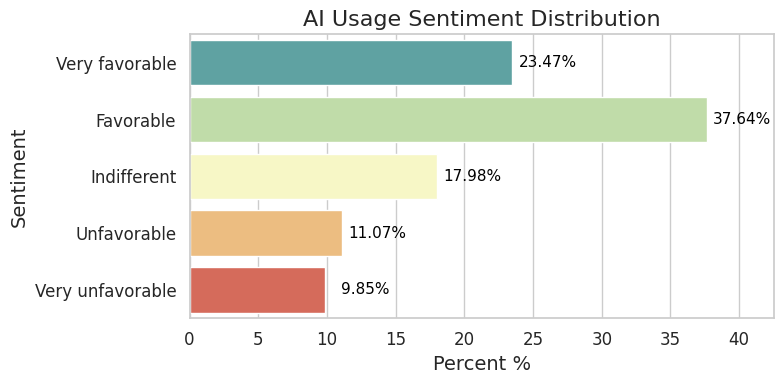

In [243]:
palette = sns.color_palette("Spectral", n_colors=len(aisentiment_df))
palette = palette[::-1]
plt.figure(figsize=(8,4))
sns.barplot(
    data=aisentiment_df,
    x='Percent',
    y=labels,
    palette=palette,
    hue='Sentiment'
)

for index, value in enumerate(aisentiment_df['Percent']):
    plt.text(value + 4.7, index, f"{value}%", va='center', ha='right', fontsize=11, color='black')

plt.xlim(0, max(aisentiment_df['Percent'])*1.13)
plt.title('AI Usage Sentiment Distribution')
plt.xlabel('Percent %')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()

### Insights:

&emsp;Most respondents hold a positive attitude toward AI in the workplace, with `(61.11%)` `positive sentiments` reponses.  
&emsp;`(17.98%)` account for `neutral` perspectives, while `(20.92%)` shows `negative` sentiment towards AI usage.  

&emsp;This suggests a strong overall acceptance of AI within professional environments, with positivity outweighing negativity by a significant margin.

### What are the most used `AI models/agents` in 2025?

In [202]:
AImodelCounter = Counter()
for lm in clean_df['AIModelsHaveWorkedWith'].dropna().str.split(";"):
    AImodelCounter.update(lm)

AImodelsUsage_df = pd.DataFrame(dict(AImodelCounter).items(), columns=['AIModel','Count'])
AImodelsUsage_df['Percent'] = round(AImodelsUsage_df['Count']/AImodelsUsage_df['Count'].sum() * 100, 2)
AImodelsUsage_df = AImodelsUsage_df.sort_values(['Percent'],ascending=False)

In [210]:
provider_map = {
    "openAI GPT (chatbot models)": "OpenAI",
    "openAI Reasoning models": "OpenAI",
    "openAI Image generating models": "OpenAI",

    "Gemini (Flash general purpose models)": "Google Gemini",
    "Gemini (Pro Reasoning models)": "Google Gemini",

    "Anthropic: Claude Sonnet": "Anthropic",

    "DeepSeek (R- Reasoning models)": "DeepSeek",
    "DeepSeek (V- General purpose models)": "DeepSeek",

    "Meta Llama (all models)": "Meta",

    "X Grok models": "XAI",
    "Mistral AI models": "Mistral",
    "Perplexity Sonar models": "Perplexity",
    "Alibaba Cloud Qwen models": "Alibaba",
    "Microsoft Phi-4 models": "Microsoft",
    "Amazon Titan models": "Amazon",
    "Cohere: Command A": "Cohere",
    "Reka (Flash 3 or other Reka models)": "Reka"
}

AImodelsUsage_df['Provider'] = AImodelsUsage_df['AIModel'].map(provider_map)
grouped = AImodelsUsage_df.groupby('Provider')[['Count', 'Percent']].sum().reset_index().sort_values('Percent',ascending=False)
grouped['Percent'] = round(grouped['Percent'], 2)

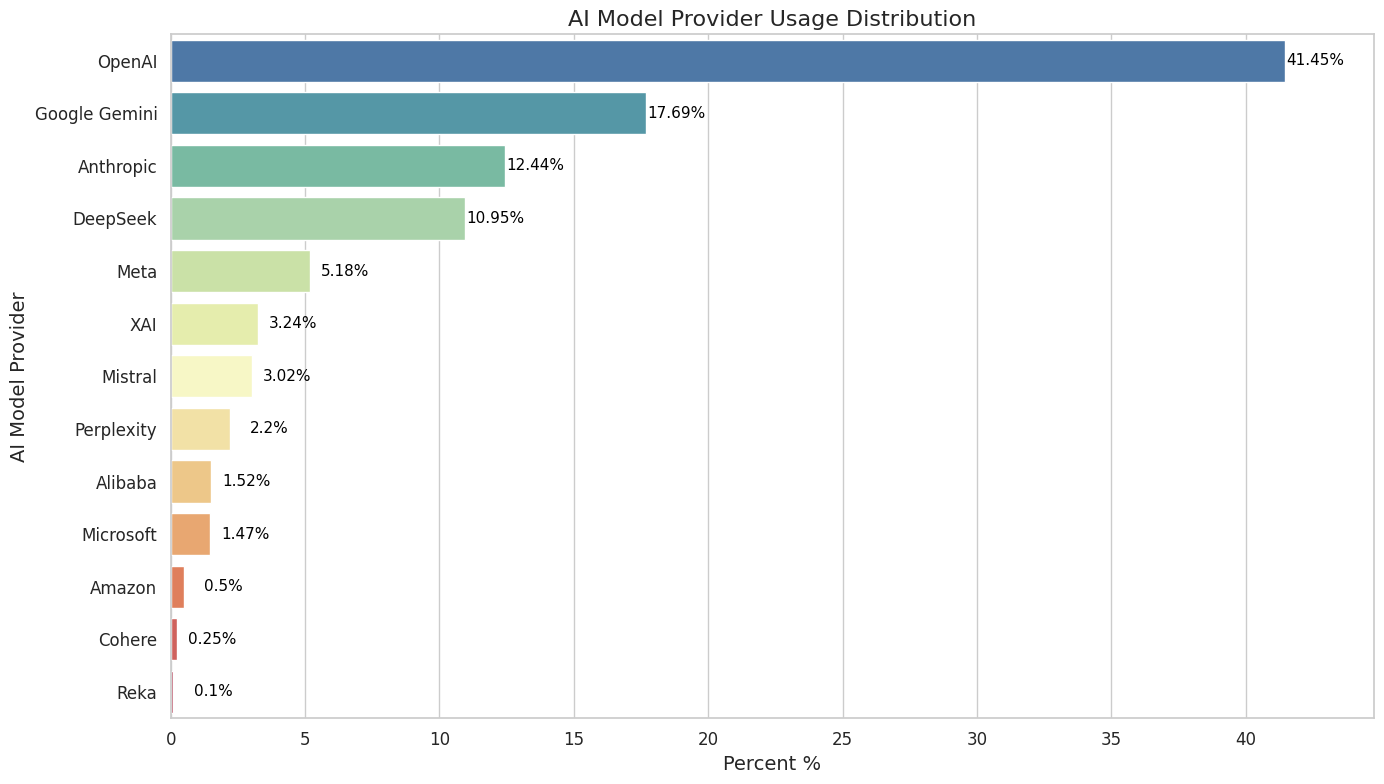

In [215]:
palette = sns.color_palette("Spectral", n_colors=len(grouped))
palette = palette[::-1]
plt.figure(figsize=(14,8))
sns.barplot(
    data=grouped,
    x='Percent',
    y='Provider',
    palette=palette,
    hue='Provider'
)

for index, value in enumerate(grouped['Percent']):
    plt.text(value + 2.2, index, f"{value}%", va='center', ha='right', fontsize=11, color='black')

plt.xlim(0, max(grouped['Percent'])*1.08)
plt.title('AI Model Provider Usage Distribution')
plt.xlabel('Percent %')
plt.ylabel('AI Model Provider')
plt.tight_layout()
plt.show()

### Insights:
  
- `OpenAI` represents the largest share `(41.45%)`, clearly showcasing thier wider influence over the field with thier variety of models   
such as ChatGPT and Sora.
- `Google Gemini (17.69%)` and `Anthropic (12.44%)` are also seen with significant usage.  
- Emerging providers like `DeepSeek (10.95%)` continue to gain traction, while others such as `Cohere` and `Reka` remain niche.